In [53]:
##################################
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd 
import numpy as np
import random
##################################

In [54]:
df = pd.read_csv("bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [55]:
job = [ "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown"]

for ii in range(len(job)): 
    df.job[df.job == job[ii]] = ii

marital = ["divorced","married","single","unknown"]

for ii in range(len(marital)):
    df.marital[df.marital == marital[ii]] = ii

education =  ["primary","secondary","tertiary","unknown"]

for ii in range(len(education)):
    df.education[df.education == education[ii]] = ii

df.default[df.default == "no" ] = 0
df.default[df.default == "yes" ] = 1

df.housing[df.housing == "no" ] = 0
df.housing[df.housing == "yes" ] = 1

df.loan[df.loan == "no" ] = 0
df.loan[df.loan == "yes" ] = 1

contact = ["telephone","cellular","unknown"] 

for ii in range(len(contact)):
    df.contact[df.contact == contact[ii]] = ii

month = ["jan", "feb", "mar", "apr", "may","jun", "jul", "aug", "sep", "oct","nov", "dec"]

for ii in range(len(month)):
    df.month[df.month == month[ii]] = ii

poutcome = ["other","failure","success", "unknown"]


for ii in range(len(poutcome)):
    df.poutcome[df.poutcome == poutcome[ii]] = ii

df.y[df.y == "no" ] = 0
df.y[df.y == "yes" ] = 1

<ipython-input-55-3dfb5d4b2e70>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.job[df.job == job[ii]] = ii
<ipython-input-55-3dfb5d4b2e70>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.marital[df.marital == marital[ii]] = ii
<ipython-input-55-3dfb5d4b2e70>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.education[df.education == education[ii]] = ii
<ipython-input-55-3dfb5d4b2e70>:16: SettingWithCopyWarning: 
A value is 

In [56]:
sampled = df.sample(1000)
sampled.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
140,32,4,0,2,0,948,0,0,1,12,7,204,2,-1,0,3,0
1242,35,1,1,0,0,298,1,0,1,13,4,135,2,370,2,1,0
3646,48,1,2,1,0,312,1,1,1,3,1,369,2,-1,0,3,0
1723,45,1,1,0,0,97,1,0,2,7,4,923,3,-1,0,3,0
331,29,9,2,2,0,828,1,0,1,16,3,215,3,321,3,0,0


[0.09008678 0.07381006 0.04405285 0.05201456 0.00340269 0.09119475
 0.02605526 0.01404201 0.03880741 0.08373966 0.08618012 0.2166352
 0.06727269 0.02787485 0.03808988 0.04674122]


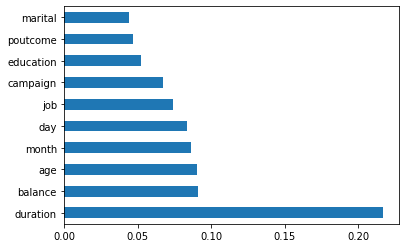

In [57]:
x = sampled.iloc[:, 0:16]
y = sampled.iloc[:, -1]
y = y.astype('int')

model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [58]:
new_df = np.array(sampled[['duration','month','day','age']])

new_df

array([[317, 4, 15, 43],
       [549, 10, 21, 41],
       [564, 5, 17, 46],
       ...,
       [369, 1, 3, 48],
       [923, 4, 7, 45],
       [215, 3, 16, 29]], dtype=object)

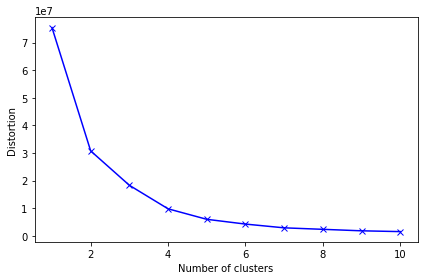

In [59]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(new_df)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 11), distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()

plt.show()

In [60]:
#Uses the Kmeans algorithm

km = KMeans(3)

km.fit(new_df)


KMeans(n_clusters=3)

In [61]:
x = np.nan_to_num(new_df)

In [62]:
#uses the pca algorithm to be able to easily plot the kmeans
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_components = pca.fit_transform(x)
pca_components

labels = km.labels_

In [63]:
#
pca_df = pd.DataFrame(data = pca_components, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,53.607032,1.810523
1,285.609627,0.260506
2,300.603966,5.114268
3,-91.399668,8.617305
4,-166.397800,7.451998


In [64]:
# sets the data for easily plotable dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,53.607032,1.810523,0
1,285.609627,0.260506,1
2,300.603966,5.114268,1
3,-91.399668,8.617305,0
4,-166.397800,7.451998,0


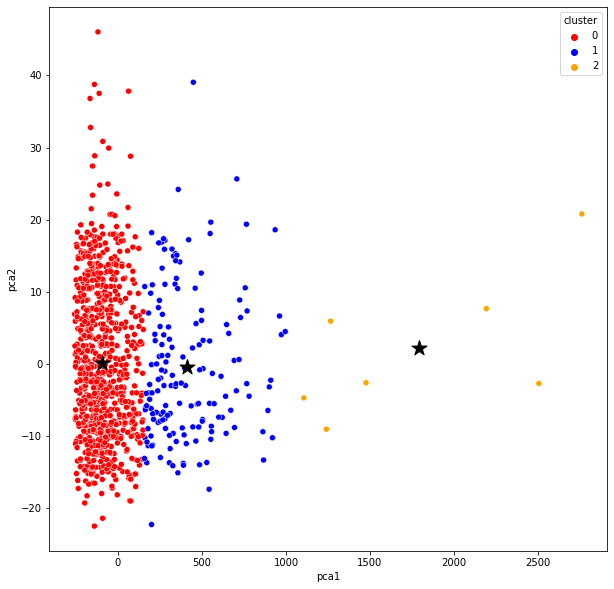

In [65]:
#Before 10 cross validation
import seaborn as sns
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'blue', 'orange'])

centers_on_PCs = pca.transform(km.cluster_centers_)
plt.scatter(centers_on_PCs[:, 0], centers_on_PCs[:,1], s= 250, c = "k", marker="*")

In [66]:
#10-fold validation
print("Percentage of positives")
sampled['y'].value_counts()/len(sampled)

Percentage of positives


0    0.89
1    0.11
Name: y, dtype: float64

In [67]:
#Set up data for train
x = new_df
y = np.array(sampled['y'])
y = y.astype('int')

In [ ]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1)

cv=KFold(n_splits=10, shuffle=True, random_state=1)

predicted_score = cross_val_score(clf, x, y, cv=cv)


In [ ]:
from numpy import mean, std
print('Accuracy: %.3f ( +/- %.3f)' % (mean(predicted_score), std(predicted_score)))

In [ ]:
from sklearn.model_selection import cross_val_predict



predicted = cross_val_predict(clf, x, y, cv=cv)

predicted

In [13]:
#uses the pca algorithm to be able to easily plot the kmeans
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_components = pca.fit_transform(x)
pca_components

labels = km.labels_

In [14]:
#
pca_df = pd.DataFrame(data = pca_components, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,296.208757,9.102351
1,-135.770450,18.120009
2,14.205468,8.282508
3,233.176033,-7.710555
4,232.190170,0.740156


In [15]:
# sets the data for easily plotable dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,296.208757,9.102351,1
1,-135.770450,18.120009,0
2,14.205468,8.282508,0
3,233.176033,-7.710555,1
4,232.190170,0.740156,1


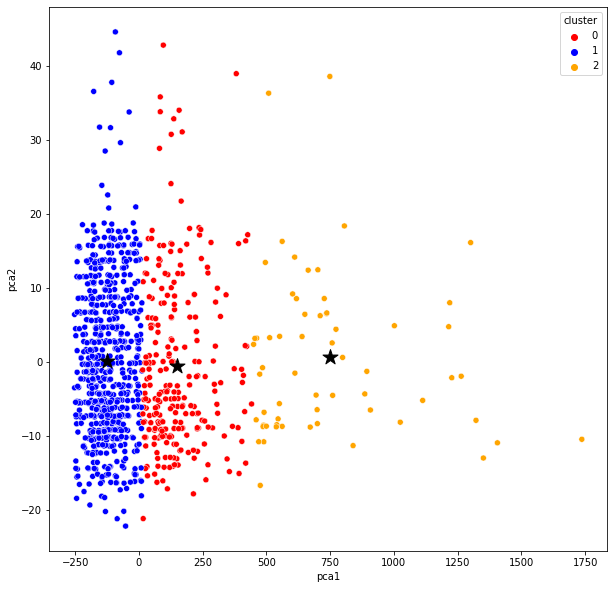

In [25]:
#Before 10 cross validation
import seaborn as sns
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'blue', 'orange'])

centers_on_PCs = pca.transform(km.cluster_centers_)
plt.scatter(centers_on_PCs[:, 0], centers_on_PCs[:,1], s= 250, c = "k", marker="*")

In [16]:
#10-fold validation
print("Percentage of positives")
sampled['y'].value_counts()/len(sampled)

Percentage of positives


0    0.892
1    0.108
Name: y, dtype: float64

In [48]:
#Set up data for train
x = new_df
y = np.array(sampled['y'])
y = y.astype('int')

In [49]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1)

cv=KFold(n_splits=10, shuffle=True, random_state=1)

predicted_score = cross_val_score(clf, x, y, cv=cv)


In [50]:
from numpy import mean, std
print('Accuracy: %.3f ( +/- %.3f)' % (mean(predicted_score), std(predicted_score)))

Accuracy: 0.892 ( +/- 0.039)


In [51]:
from sklearn.model_selection import cross_val_predict



predicted = cross_val_predict(clf, x, y, cv=cv)

predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,